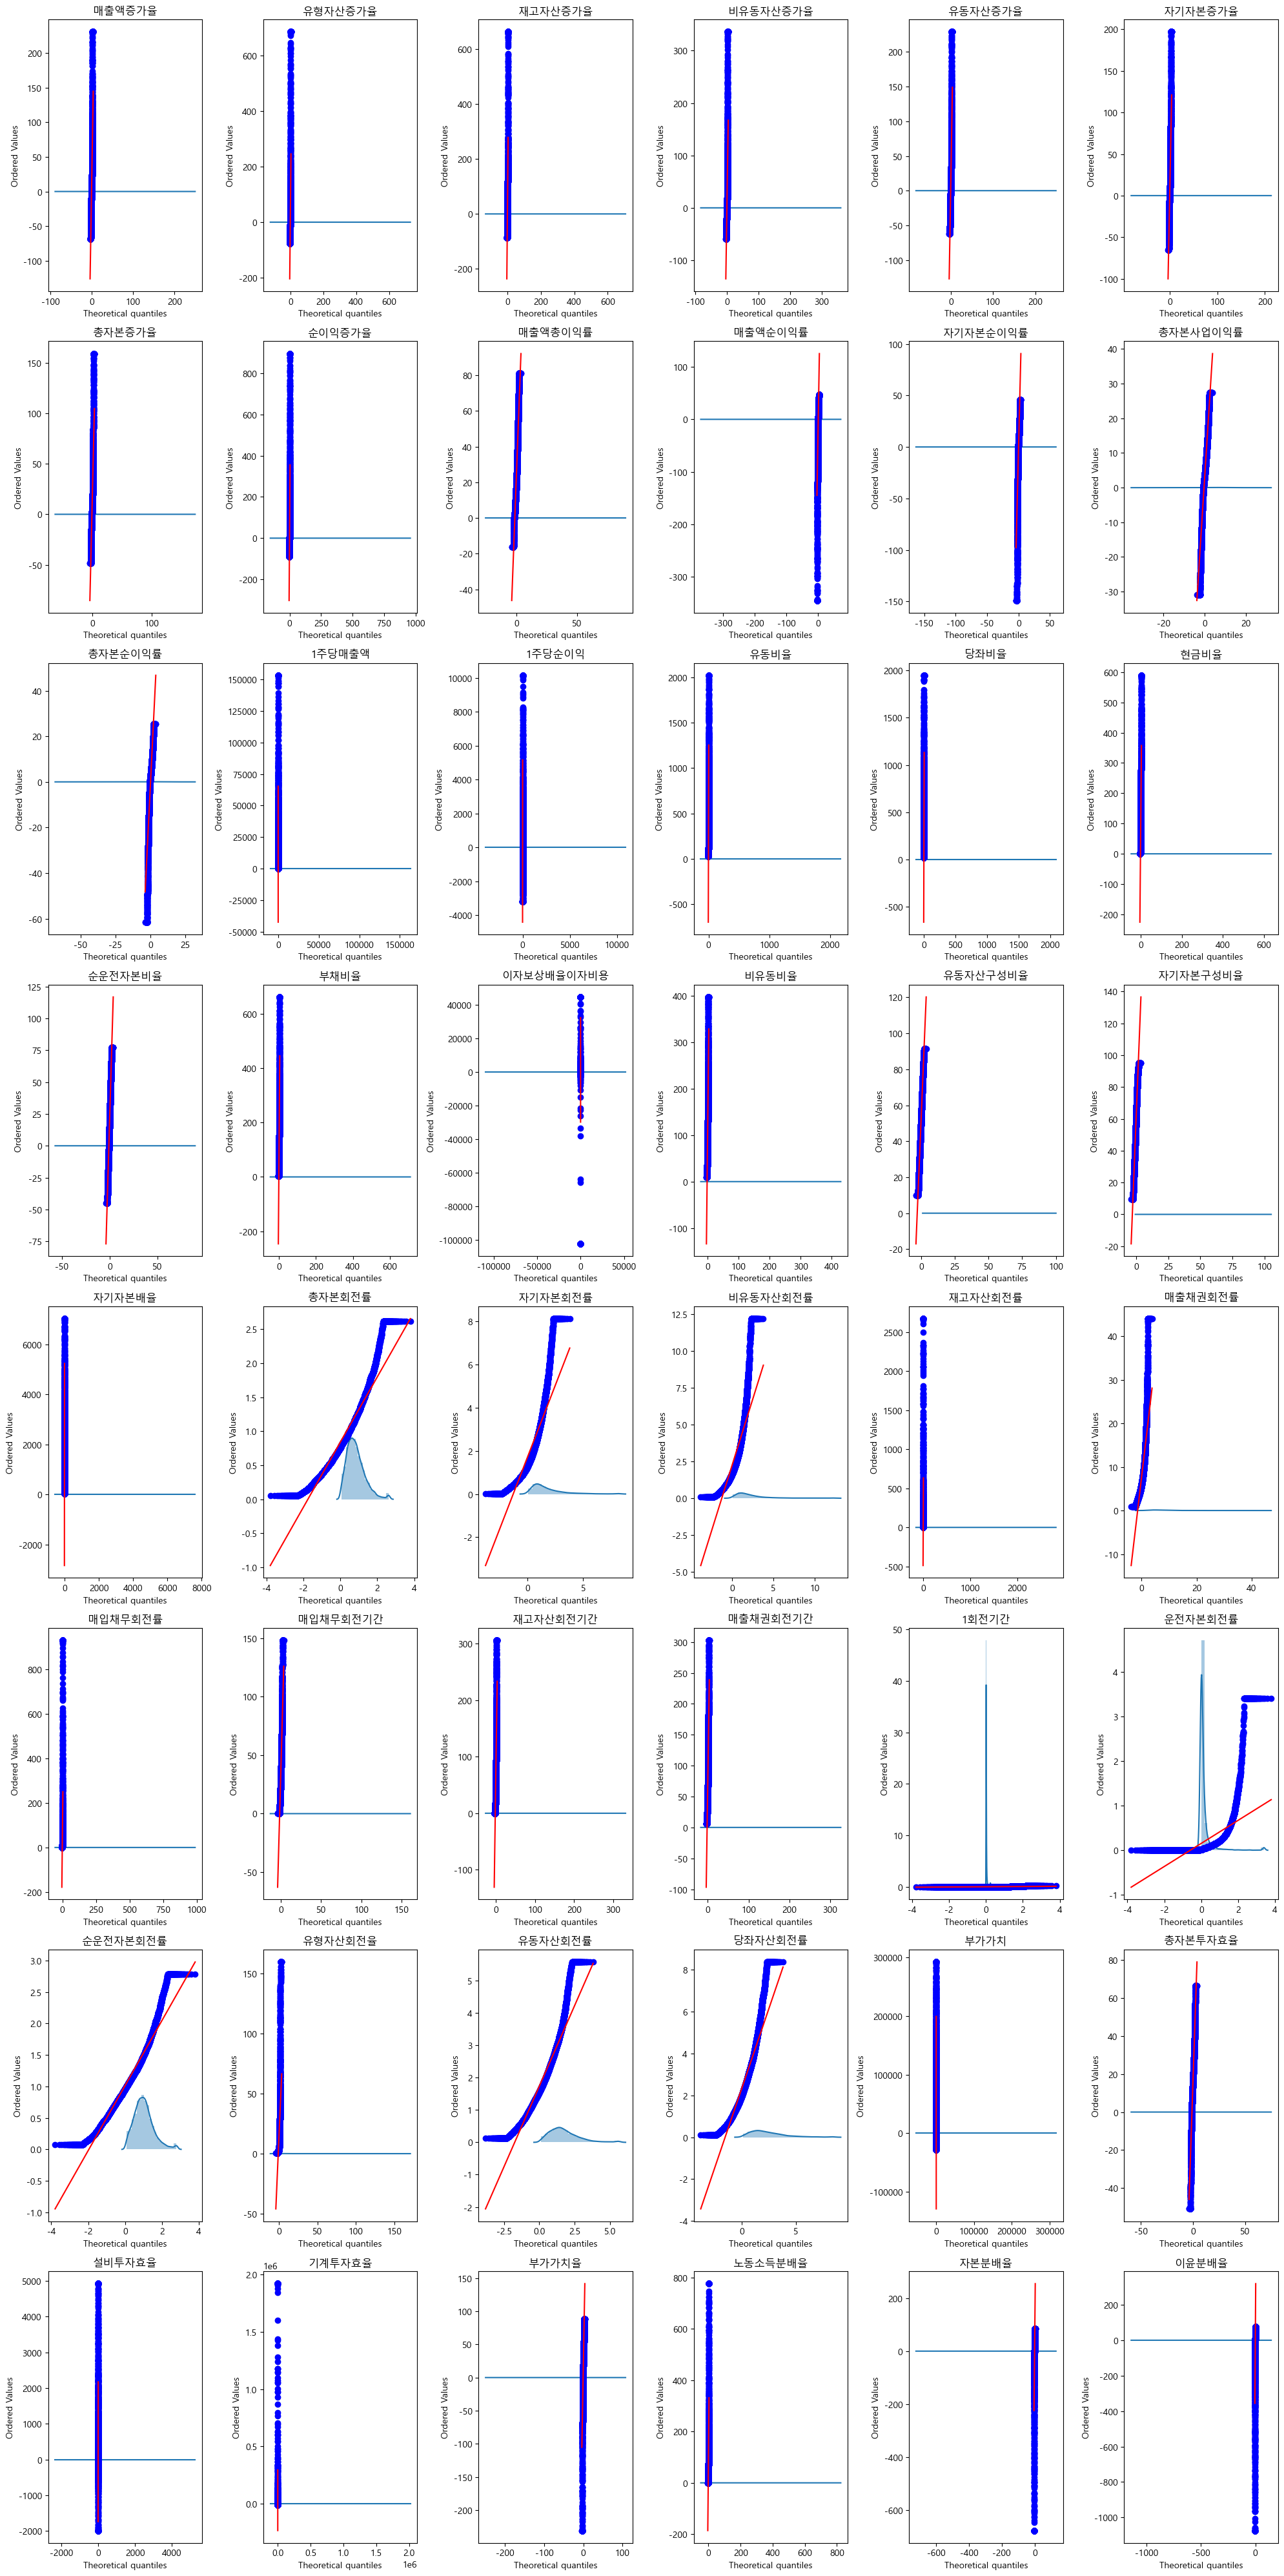

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, shapiro, kstest, probplot
from scipy.stats.mstats import winsorize
import warnings

# 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')

# 데이터 로드
df = pd.read_csv('../데이터자료/5. label 지정 완료.csv', encoding='cp949')

# 윈저라이징을 통한 이상치 조정
selected_columns = ['매출액증가율', '유형자산증가율', '재고자산증가율', '비유동자산증가율', '유동자산증가율', '자기자본증가율', '총자본증가율', '순이익증가율', 
                    '매출액총이익률', '매출액순이익률', '자기자본순이익률', '총자본사업이익률', '총자본순이익률', '1주당매출액', '1주당순이익', '유동비율', 
                    '당좌비율', '현금비율', '순운전자본비율', '부채비율', '이자보상배율이자비용', '비유동비율', '유동자산구성비율', '자기자본구성비율', 
                    '자기자본배율', '총자본회전률', '자기자본회전률', '비유동자산회전률', '재고자산회전률', '매출채권회전률', '매입채무회전률', 
                    '매입채무회전기간', '재고자산회전기간', '매출채권회전기간', '1회전기간', '운전자본회전률', '순운전자본회전률', '유형자산회전율', 
                    '유동자산회전률', '당좌자산회전률', '부가가치', '총자본투자효율', '설비투자효율', '기계투자효율', '부가가치율', '노동소득분배율', 
                    '자본분배율', '이윤분배율']

for col in selected_columns:
    df[col] = winsorize(df[col], limits=(0.01, 0.01))

# 데이터 분포 시각화 함수 정의
def plot_data_distribution(data, columns):
    col_n = 6
    row_n = int(np.ceil(len(columns) / col_n))
    fig, axes = plt.subplots(nrows=row_n, ncols=col_n, figsize=(20, row_n * 5))

    for i, col in enumerate(columns):
        ax = axes[int(i/col_n), int(i%col_n)]
        sns.distplot(data[col], bins=20, ax=ax)
        probplot(data[col], dist='norm', plot=ax)
        ax.set_title(col)

    plt.tight_layout()
    plt.show()

# 선택한 컬럼에 대한 시각화
plot_data_distribution(df, selected_columns)

# 최종 데이터 저장
df.to_csv('../데이터자료/7. 이상치수정완료.csv', encoding='cp949')
